In [1]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep
import vector as vec
import matplotlib
from tqdm import tqdm
from numba import prange,njit
import math
import os
plt.style.use(hep.style.CMS)
%matplotlib inline

In [2]:
@njit
def dist_numba(refEta, refPhi, otherTsEta, otherTsPhi):
    out = []
    for i in range(len(otherTsEta)):
        deltaphi=abs(otherTsPhi[i] - refPhi)
        if deltaphi>math.pi: deltaphi=deltaphi-2*math.pi
        distance = ((otherTsEta[i] - refEta) ** 2 + (deltaphi) ** 2) ** 0.5
        out.append(distance)
    return np.array(out)
@njit
def distWrap_numba(refEta, refPhi, otherTsEta, otherTsPhi):
    out = []
    for i in range(len(otherTsEta)):
        deltaPhi = otherTsPhi[i] - refPhi
        deltaPhi = (deltaPhi + np.pi) % (2 * np.pi) - np.pi
        distance = ((otherTsEta[i] - refEta) ** 2 + deltaPhi ** 2) ** 0.5
        out.append(distance)
    return np.array(out)

@njit
def flatten_numba(a):
    return [x[0] if len(x) else 0 for x in a]



In [3]:
#filename='/eos/cms/store/group/dpg_hgcal/comm_hgcal/wredjeb/TICLv5Performance/TimeResolutionPtError0PU/SinglePionTiming_1p9_100GeV/histo/histo_96692_0.root'
filename = "/eos/cms/store/group/dpg_hgcal/comm_hgcal/wredjeb/TICLv5Performance/TimeResolutionFinal200PU/SinglePionTimingPU_1p9_50GeV/histo/histo_81848_2.root"
path = "/eos/cms/store/group/dpg_hgcal/comm_hgcal/wredjeb/TICLv5Performance/TimeResolutionFinal200PU/SinglePionTimingPU_1p9_50GeV/histo/"
files = os.listdir(path)[:10]
print(files)
file = uproot.open(filename)

['histo_81848_0.root', 'histo_81848_1.root', 'histo_81848_10.root', 'histo_81848_11.root', 'histo_81848_12.root', 'histo_81848_13.root', 'histo_81848_14.root', 'histo_81848_15.root', 'histo_81848_16.root', 'histo_81848_17.root']


In [4]:
file.keys()

['ticlDumper;1',
 'ticlDumper/simtrackstersSC;11',
 'ticlDumper/simtrackstersSC;10',
 'ticlDumper/associations;11',
 'ticlDumper/associations;10',
 'ticlDumper/simtrackstersCP;9',
 'ticlDumper/simtrackstersCP;8',
 'ticlDumper/simtracksters2HitsSC;9',
 'ticlDumper/simtracksters2HitsSC;8',
 'ticlDumper/simtracksters2HitsCP;8',
 'ticlDumper/simtracksters2HitsCP;7',
 'ticlDumper/trackstersCLUE3DHigh;2',
 'ticlDumper/trackstersCLUE3DHigh;1',
 'ticlDumper/trackstersTiclCandidate;2',
 'ticlDumper/trackstersTiclCandidate;1',
 'ticlDumper/trackstersSuperclusteringDNN;1',
 'ticlDumper/candidates;1',
 'ticlDumper/tracks;1',
 'ticlDumper/simTICLCandidate;1']

In [11]:

alltracksters = file['ticlDumper/trackstersCLUE3DHigh;2']
allsimtrackstersCP = file['ticlDumper/simtrackstersCP;9']
alltracks = file["ticlDumper/tracks;1"]
allassociations = file['ticlDumper/associations;11']
allsimcands=file["ticlDumper/simTICLCandidate;1"]

In [12]:
allsimtrackstersCP.keys()
#allsimcands.keys()

['event',
 'event/run_',
 'event/luminosityBlock_',
 'event/event_',
 'NTracksters',
 'NClusters',
 'time',
 'timeError',
 'regressed_energy',
 'raw_energy',
 'raw_em_energy',
 'raw_pt',
 'raw_em_pt',
 'barycenter_x',
 'barycenter_y',
 'barycenter_z',
 'barycenter_eta',
 'barycenter_phi',
 'EV1',
 'EV2',
 'EV3',
 'eVector0_x',
 'eVector0_y',
 'eVector0_z',
 'sigmaPCA1',
 'sigmaPCA2',
 'sigmaPCA3',
 'regressed_pt',
 'pdgID',
 'trackIdx',
 'trackTime',
 'timeBoundary',
 'boundaryX',
 'boundaryY',
 'boundaryZ',
 'boundaryEta',
 'boundaryPhi',
 'boundaryPx',
 'boundaryPy',
 'boundaryPz',
 'track_boundaryX',
 'track_boundaryY',
 'track_boundaryZ',
 'track_boundaryEta',
 'track_boundaryPhi',
 'track_boundaryPx',
 'track_boundaryPy',
 'track_boundaryPz',
 'id_probabilities',
 'vertices_indexes',
 'vertices_x',
 'vertices_y',
 'vertices_z',
 'vertices_time',
 'vertices_timeErr',
 'vertices_energy',
 'vertices_correctedEnergy',
 'vertices_correctedEnergyUncertainty',
 'vertices_multiplicity']

In [13]:
alltracksters.keys()

['event',
 'event/run_',
 'event/luminosityBlock_',
 'event/event_',
 'NTracksters',
 'NClusters',
 'time',
 'timeError',
 'regressed_energy',
 'raw_energy',
 'raw_em_energy',
 'raw_pt',
 'raw_em_pt',
 'barycenter_x',
 'barycenter_y',
 'barycenter_z',
 'barycenter_eta',
 'barycenter_phi',
 'EV1',
 'EV2',
 'EV3',
 'eVector0_x',
 'eVector0_y',
 'eVector0_z',
 'sigmaPCA1',
 'sigmaPCA2',
 'sigmaPCA3',
 'id_probabilities',
 'vertices_indexes',
 'vertices_x',
 'vertices_y',
 'vertices_z',
 'vertices_time',
 'vertices_timeErr',
 'vertices_energy',
 'vertices_correctedEnergy',
 'vertices_correctedEnergyUncertainty',
 'vertices_multiplicity']

In [14]:
simtrackstersCP = allsimtrackstersCP.arrays([
 'regressed_energy',
 'raw_energy',
 'raw_em_energy',
 'raw_pt',
 'raw_em_pt',
 'barycenter_x',
 'barycenter_y',
 'barycenter_z',
 'barycenter_eta',
 'barycenter_phi',
 'EV1',
 'EV2',
 'EV3',
 'eVector0_x',
 'eVector0_y',
 'eVector0_z',
 'sigmaPCA1',
 'sigmaPCA2',
 'sigmaPCA3',
 'regressed_pt',
 'pdgID'])

In [15]:
tracksters = alltracksters.arrays([
 'regressed_energy',
 'raw_energy',
 'raw_em_energy',
 'raw_pt',
 'raw_em_pt',
 'barycenter_x',
 'barycenter_y',
 'barycenter_z',
 'barycenter_eta',
 'barycenter_phi',
 'EV1',
 'EV2',
 'EV3',
 'eVector0_x',
 'eVector0_y',
 'eVector0_z',
 'sigmaPCA1',
 'sigmaPCA2',
 'sigmaPCA3'])
print(tracksters[0]["regressed_energy"])

[8.64, 4.31, 6.68, 4.78, 7.89, 5.42, 5.65, ... 4.15, 4.48, 4.22, 4.6, 5.64, 5.37, 0]


In [16]:
allsimtrackstersCP.keys()
tsCP=allsimtrackstersCP.arrays(["trackIdx"])
tracks=alltracks.arrays(["track_pt","track_quality","track_missing_outer_hits"])
simcands=allsimcands.arrays(["simTICLCandidate_track_in_candidate"])
associations = allassociations.arrays(['tsCLUE3D_simToReco_CP',
 'tsCLUE3D_simToReco_CP_score',
 'tsCLUE3D_simToReco_CP_sharedE','tsCLUE3D_recoToSim_CP_sharedE',"tsCLUE3D_recoToSim_CP"])
trks=alltracks.arrays(["track_hgcal_eta","track_hgcal_phi","track_pt","track_id"])

#print(associations[0][])

#print(tsCP[0],tracks[0],simcands[0])

  0%|          | 0/1 [00:00<?, ?it/s]/tmp/ipykernel_1090/4180742197.py:50: RuntimeWarning: invalid value encountered in double_scalars
  contamination=1. - np.sum(sharedEnergy_sorted[(distance_sorted<distScan[k]) & (assocIdxs_sorted==i) ])/np.sum(tsEnergy_sorted[distance_sorted<distScan[k]])


[0, 1, 2, 3, 4, 5, 6, 7, 8, ... 7723, 7734, 7735, 7736, 7739, 7740, 7741, 7742, 7743]
5352
[1603, 1093, -1, -1, -1, -1, -1, -1, -1, ... -1, 1939, 5501, 3952, -1, 5971, -1, -1]


/tmp/ipykernel_1090/4180742197.py:49: RuntimeWarning: invalid value encountered in double_scalars
  frac=tempEn/totalSharedE
/tmp/ipykernel_1090/4180742197.py:54: RuntimeWarning: invalid value encountered in double_scalars
  listE.append(tempEn/totalSharedE)
100%|██████████| 1/1 [00:04<00:00,  4.54s/it]


[0, 0, 0, 0, 0, 0.9839608551994541, 0.9839608551994541, 0.990494076124006, 0.990494076124006, 0.9937204158430133, 0.9961621838849191, 0.9963965299856474, 0.9924469568747035, 0.9930906060486282, 0.9930906060486282, 0.9952445030560815, 0.9965261714069648, 0.9965261714069648, 0.9968800675430991, 0.9973040482000902, 0.9982537370860824, 0.9982537370860824, 0.9983691181230333, 0.9984346980115569, 0.9984741115498488, 0.9987018405049597, 0.99877628148244, 0.9988418292297432, 0.9989413034226619, 0.9990113252013063, 0.9990655589654349, 0.999176725619278, 0.9992586954665724, 0.9993482664199894, 0.9993946529302373, 0.999424737544312, 0.9995586846632071, 0.999580384942112, 0.9995989375598747, 0.9996280306208256, 0.9996426283933152, 0.9996766762459134, 0.9996912228798983, 0.999717092167497, 0.9997384903114422, 0.9997949387974048, 0.9997997361346227, 0.9998054247712852, 0.9998139905416733, 0.9998300152363746]
0.1959183673469388


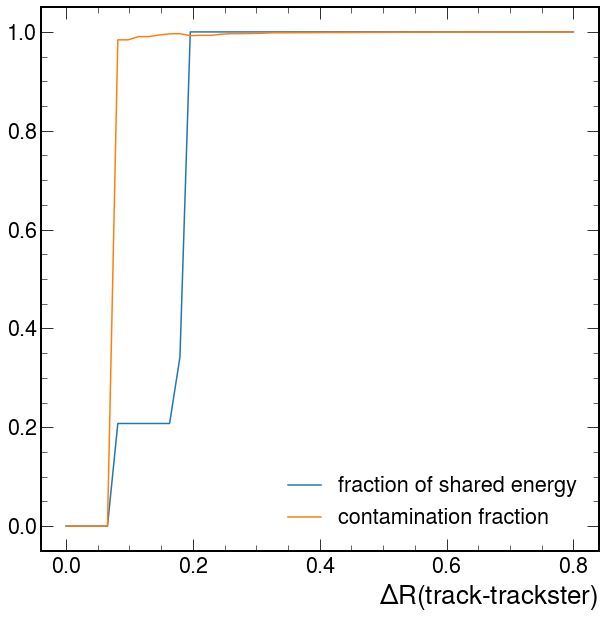

In [29]:
#EXAMPLE PLOT 

for ev in tqdm(range(1)):#len(tsCP))):
    assEv=associations[ev]
    print(trks[ev]["track_id"])
    print(len(trks[ev]["track_id"]))
    print(tsCP[ev]["trackIdx"])
    for i in range(70):#len(tsCP[ev]["trackIdx"])):
        #print(len((tsCP[ev]["trackIdx"])))
        if tsCP[ev]["trackIdx"][i]==-1: continue
        #print(tsCP[ev]["trackIdx"][i], np.where(trks[ev]["track_id"]==tsCP[ev]["trackIdx"][i]), len(trks[ev]["track_id"]))#, trks[ev]["track_id"][np.where(trks[ev]["track_id"]==tsCP[ev]["trackIdx"][i])[0][0]])
        try:
            trackIdx=np.where(trks[ev]["track_id"]==tsCP[ev]["trackIdx"][i])[0][0]
        except ValueError:
            continue
        #trackIdx=tsCP[ev]["trackIdx"][i]
        
        #print(len(trks[ev]["track_hgcal_eta"]),trackIdx)
        #print(trks[ev]["track_hgcal_eta"][trackIdx])
        refEta=trks[ev]["track_hgcal_eta"][trackIdx]
        refPhi=trks[ev]["track_hgcal_phi"][trackIdx]
        tsEv = tracksters[ev]
        otherTsEta = tsEv["barycenter_eta"]
        otherTsPhi = tsEv["barycenter_phi"]
        #distance = ((otherTsEta-refEta)**2 + (otherTsPhi-refPhi)**2)**0.5
        #print(otherTsPhi)
        #print(distance)
        distance = distWrap_numba(refEta, refPhi, otherTsEta, otherTsPhi)
        #print(distance)
        
        idx_sort = np.array(distance).argsort()
        distance_sorted = distance[idx_sort]
        #print (distance_sorted)
        tsEnergy_sorted = tsEv.raw_energy[idx_sort]
        sharedEnergy_sorted = assEv["tsCLUE3D_recoToSim_CP_sharedE"][idx_sort]
        assocIdxs_sorted = assEv["tsCLUE3D_recoToSim_CP"][idx_sort]
        #print(assEv["tsCLUE3D_recoToSim_CP_sharedE"][0])
        #print(assEv["tsCLUE3D_recoToSim_CP"][0])
        #print(len(assEv["tsCLUE3D_simToReco_CP_sharedE"]))
        #print(len(assEv.tsCLUE3D_recoToSim_CP_sharedE), len(idx_sort), len(tsEv["barycenter_eta"]))
        totalSharedE=np.sum(sharedEnergy_sorted[assocIdxs_sorted==i])
        #print(totalSharedE)
        distScan=np.linspace(0,0.8,50)
        listE=[]
        listContamination=[]
        radius=-1
        for k in range(len(distScan)):
            tempEn=np.sum(sharedEnergy_sorted[(distance_sorted<distScan[k]) & (assocIdxs_sorted==i) ])
            frac=tempEn/totalSharedE
            contamination=1. - np.sum(sharedEnergy_sorted[(distance_sorted<distScan[k]) & (assocIdxs_sorted==i) ])/np.sum(tsEnergy_sorted[distance_sorted<distScan[k]])
            if contamination != contamination : contamination=0
            if (frac>0.8 and radius==-1):
                radius=distScan[k]
            listE.append(tempEn/totalSharedE)
            listContamination.append(contamination)
            
print(listContamination)
plt.plot(distScan,listE,label="fraction of shared energy")
plt.plot(distScan,listContamination,label="contamination fraction")
plt.xlabel("$\Delta R$(track-trackster)")
plt.legend()
plt.savefig("example200PU.png")
print(radius)
        


In [18]:
#ON ALL EVENTS
CUT=0.8
dict_info={"R" : [],
           "eta_trk" : [],
           "phi_trk" : [],
           "pt_trk" : [],
           "contamination" : []
          }

for ev in tqdm(range(len(tsCP))):
    assEv=associations[ev]
    for i in range(2):#range(len(tsCP[ev]["trackIdx"]))):
        if tsCP[ev]["trackIdx"][i]==-1: continue
        try:
            trackIdx=np.where(trks[ev]["track_id"]==tsCP[ev]["trackIdx"][i])[0][0]
        except ValueError:
            continue
        
        refEta=trks[ev]["track_hgcal_eta"][trackIdx]
        refPhi=trks[ev]["track_hgcal_phi"][trackIdx]
        #print(len(tracksters))
        tsEv = tracksters[ev]
        otherTsEta = tsEv["barycenter_eta"]
        otherTsPhi = tsEv["barycenter_phi"]
        #distance = ((otherTsEta-refEta)**2 + (otherTsPhi-refPhi)**2)**0.5
        #print(distance)
        distance = distWrap_numba(refEta, refPhi, otherTsEta, otherTsPhi)
        #print(distance)
        
        idx_sort = np.array(distance).argsort()
        distance_sorted = distance[idx_sort]
        tsEnergy_sorted = tsEv.raw_energy[idx_sort]
        sharedEnergy_sorted = assEv["tsCLUE3D_recoToSim_CP_sharedE"][idx_sort]
        assocIdxs_sorted = assEv["tsCLUE3D_recoToSim_CP"][idx_sort]
        correctTrackMask=(assocIdxs_sorted==i)
        totalSharedE=np.sum(sharedEnergy_sorted[correctTrackMask])
        distScan=np.linspace(0,0.7,100)
        listE=[]
        listContamination=[]
        radius=-1
        #print(sharedEnergy_sorted[(correctTrackMask)])
        frac= np.cumsum(flatten_numba(sharedEnergy_sorted[(correctTrackMask)]))/totalSharedE
        #contamination= 1.-np.cumsum(sharedEnergy_sorted[correctTrackMaskrackMask])
        firstAboveThrIdx = np.argmax(frac>CUT)
        radius=distance_sorted[firstAboveThrIdx]
        
        try:
            contamination=1. - np.sum(sharedEnergy_sorted[(distance_sorted<radius) & (correctTrackMask) ])/np.sum(tsEnergy_sorted[distance_sorted<radius])
        except:
            contamination=0
        if math.isnan(contamination):
            contamination=0
            
            #listE.append(tempEn/totalSharedE)
            #listContamination.append(contamination)
        if radius!=-1:
            dict_info["R"].append(radius)
            dict_info["eta_trk"].append(abs(trks[ev]["track_hgcal_eta"][trackIdx]))
            dict_info["phi_trk"].append(trks[ev]["track_hgcal_phi"][trackIdx])
            dict_info["pt_trk"].append(trks[ev]["track_pt"][trackIdx])
            dict_info["contamination"].append(contamination*100)
            
            
            
        
#plt.plot(distScan,listE,label="fraction of shared energy")
#plt.plot(distScan,listContamination,label="contamination fraction")
#plt.xlabel("$\Delta R$(track-trackster)")
#plt.legend()
#print(radius)

  0%|          | 0/50 [00:00<?, ?it/s]/tmp/ipykernel_1090/3252955493.py:48: RuntimeWarning: invalid value encountered in double_scalars
  contamination=1. - np.sum(sharedEnergy_sorted[(distance_sorted<radius) & (correctTrackMask) ])/np.sum(tsEnergy_sorted[distance_sorted<radius])
100%|██████████| 50/50 [00:00<00:00, 52.94it/s]


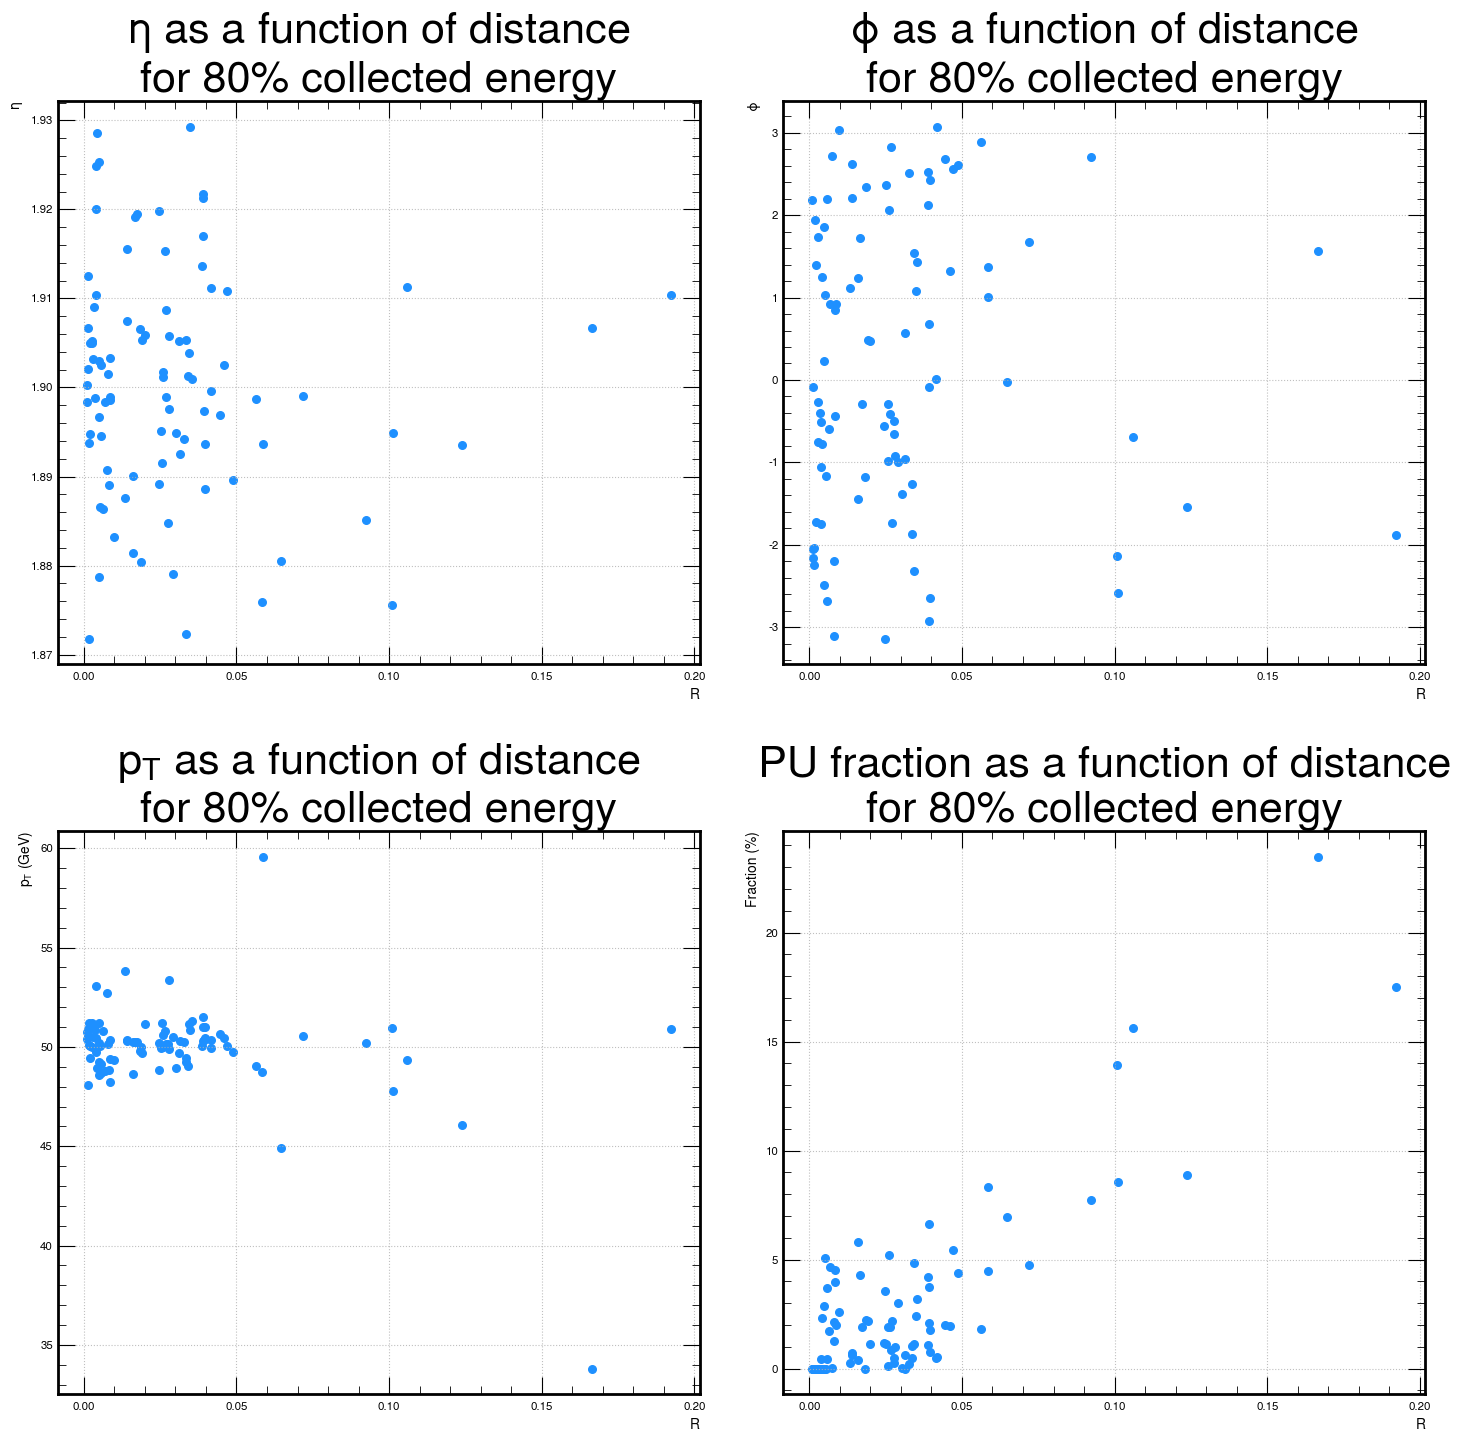

In [21]:
def scatterAx(plt, X, Y, s=10, title='title', xlabel='time (ns)', ylabel='z (cm)'):
    try:
        plt.scatter(ak.flatten(X), ak.flatten(Y), s=ak.flatten(s), color='dodgerblue')
    except:
        plt.scatter(X, Y, s=s, color='dodgerblue')
    plt.set_title(title)
    plt.set_xlabel(xlabel)
    plt.set_ylabel(ylabel)
    plt.grid()

fig, axs = plt.subplots(2, 2, figsize=(15,15), dpi=100)
plt.style.use(hep.style.CMS)

# Flatten the 2x2 grid into a list to easily access each subplot
axs = axs.flatten()

# Plot each scatter plot on its corresponding axis
scatterAx(axs[0], dict_info["R"], (dict_info["eta_trk"]), s=30, title=f'$\eta$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel=f'$\eta$')
scatterAx(axs[1], dict_info["R"], dict_info["phi_trk"],      s=30, title=f'$\phi$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel=f'$\phi$')
scatterAx(axs[2], dict_info["R"], dict_info["pt_trk"],      s=30, title=f'$p_T$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel='$p_T$ (GeV)')
scatterAx(axs[3], dict_info["R"], dict_info["contamination"],      s=30, title=f'PU fraction as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel='Fraction (%)')

plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
plt.show()

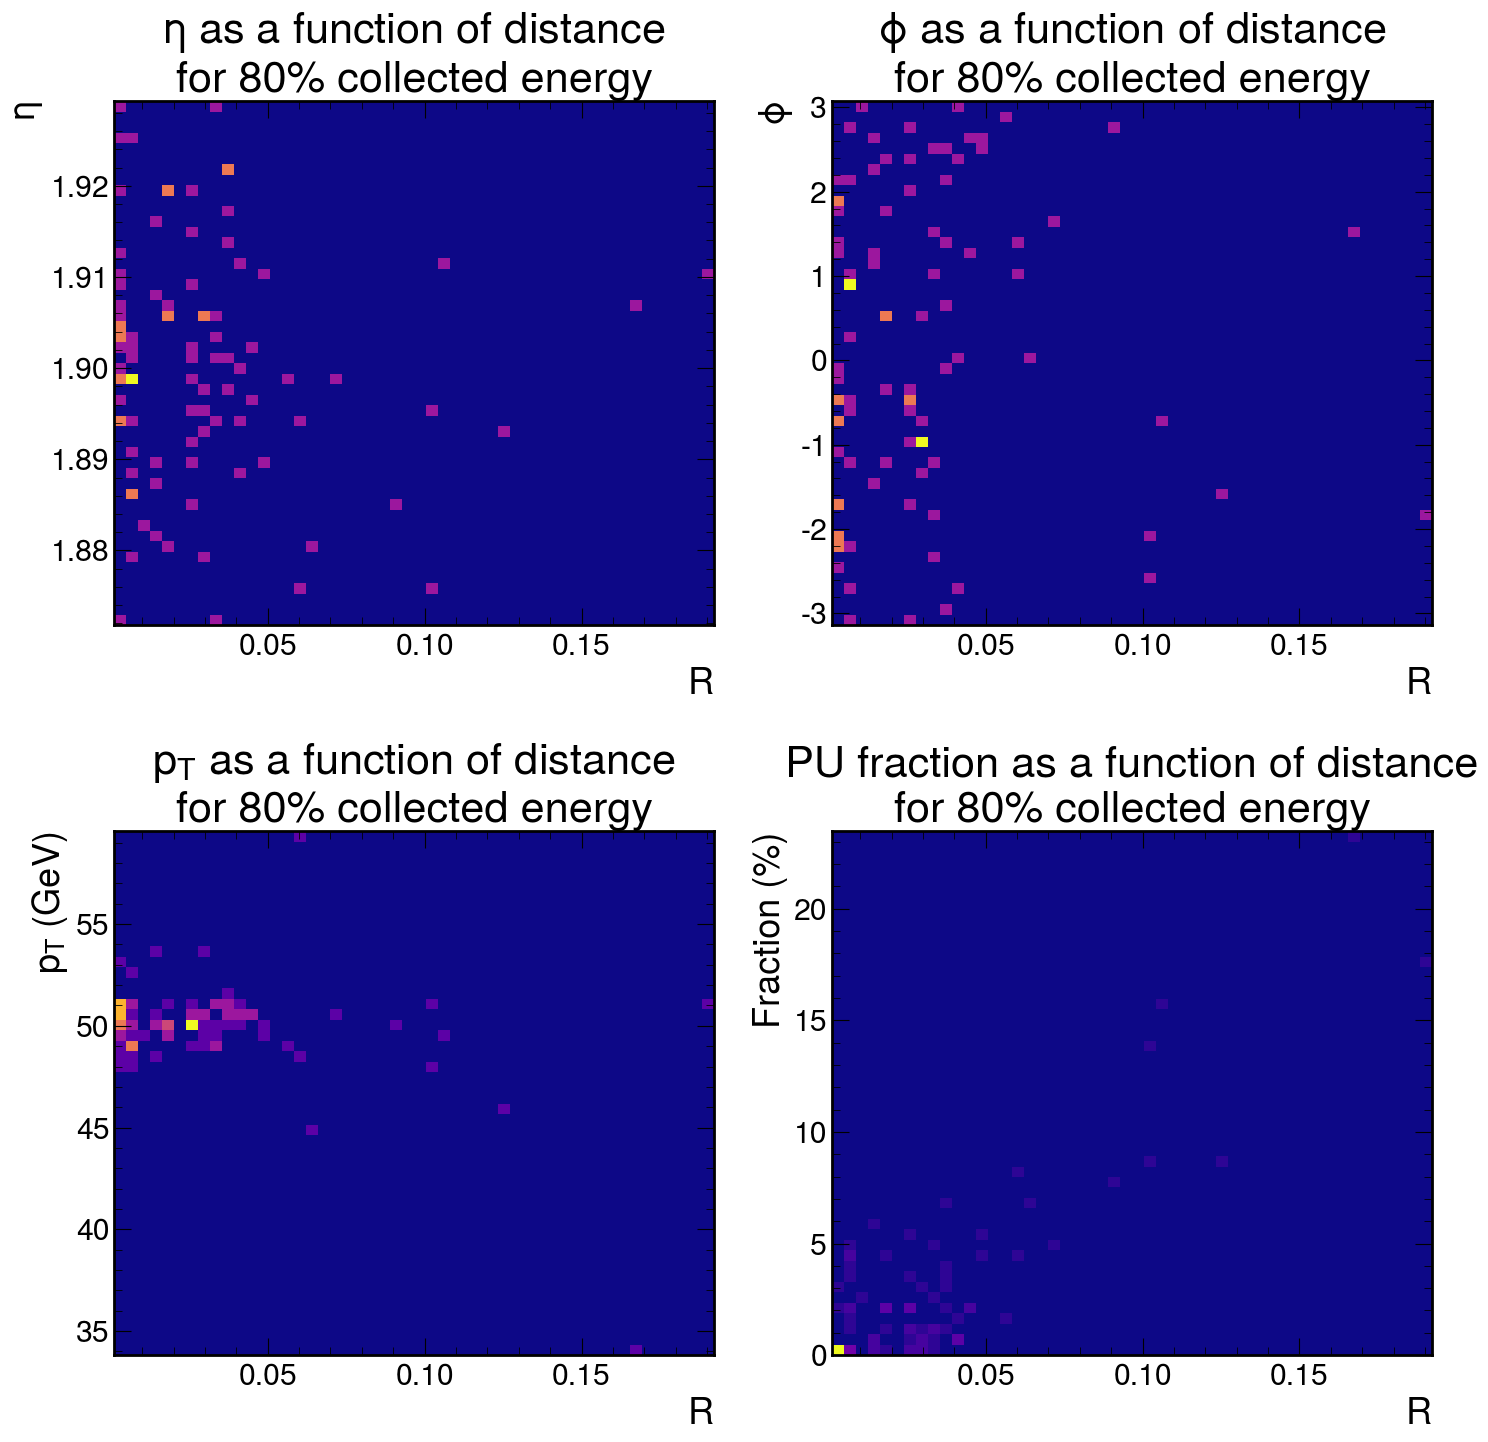

In [132]:
def hist2D_Ax(plt, X, Y, s=10, title='title', xlabel='time (ns)', ylabel='z (cm)'):
    try:
        plt.hist2d(ak.flatten(X), ak.flatten(Y),bins=10)#, s=ak.flatten(s), color='dodgerblue')
    except:
        plt.hist2d(X, Y,bins=50,cmap="plasma")#, s=s, color='dodgerblue')
    #plt.colorbar()
    plt.set_title(title)
    plt.set_xlabel(xlabel)
    plt.set_ylabel(ylabel)
    #plt.grid()

fig, axs = plt.subplots(2, 2, figsize=(15,15), dpi=100)
plt.style.use(hep.style.CMS)

# Flatten the 2x2 grid into a list to easily access each subplot
axs = axs.flatten()

# Plot each scatter plot on its corresponding axis
hist2D_Ax(axs[0], dict_info["R"], (dict_info["eta_trk"]), s=30, title=f'$\eta$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel=f'$\eta$')
hist2D_Ax(axs[1], dict_info["R"], dict_info["phi_trk"],      s=30, title=f'$\phi$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel=f'$\phi$')
hist2D_Ax(axs[2], dict_info["R"], dict_info["pt_trk"],      s=30, title=f'$p_T$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel='$p_T$ (GeV)')
hist2D_Ax(axs[3], dict_info["R"], dict_info["contamination"],      s=30, title=f'PU fraction as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel='Fraction (%)')

plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
plt.show()

# BDT

In [136]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [139]:
#array_ts_info = np.array(ts_info).T

data_dict = dict_info

df = pd.DataFrame(data_dict)
df_features = df[['eta_trk','phi_trk','pt_trk']]
df_label = df[['R', 'contamination']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_features, df_label, test_size=0.1, random_state=42)

# Convert to DMatrix format for XGBoost
train_dmatrix = xgb.DMatrix(X_train, label=y_train)
test_dmatrix = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Train the model
xg_reg = xgb.train(params, train_dmatrix, num_boost_round=100)

# Predict on test data
y_pred = xg_reg.predict(test_dmatrix)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 27.551573523335346


In [140]:
X_test, y_test

(     eta_trk   phi_trk     pt_trk
 40  1.899022  1.669055  50.569439
 22  1.924844 -1.749801  53.062775
 55  1.915380 -0.409211  50.779018
 72  1.890766  2.714345  52.702480
 0   1.898379  2.179266  50.745853
 26  1.887572  1.113763  53.815773
 39  1.903254 -0.265081  50.488155
 67  1.898948 -1.730515  50.062130
 10  1.910392 -1.879226  50.922890
 44  1.875522 -2.136540  50.926750,
            R  contamination
 40  0.071823       4.741069
 22  0.003981       0.000000
 55  0.026457       1.894836
 72  0.007498       0.007172
 0   0.001024       0.000000
 26  0.013378       0.248395
 39  0.002891       0.000000
 67  0.026995       2.166522
 10  0.192227      17.500573
 44  0.100889      13.929542)

In [141]:
y_test, y_pred

(           R  contamination
 40  0.071823       4.741069
 22  0.003981       0.000000
 55  0.026457       1.894836
 72  0.007498       0.007172
 0   0.001024       0.000000
 26  0.013378       0.248395
 39  0.002891       0.000000
 67  0.026995       2.166522
 10  0.192227      17.500573
 44  0.100889      13.929542,
 array([[ 2.3134811e-02,  2.4981649e+00],
        [ 2.8188903e-02,  3.6843147e+00],
        [ 2.1431277e-02,  2.7144346e+00],
        [ 6.3034773e-02,  3.9989049e+00],
        [ 1.7349416e-02,  2.0101247e+00],
        [ 3.6851704e-02,  3.8930230e+00],
        [ 1.4665139e-02,  2.7806849e+00],
        [ 8.1979670e-03,  1.1827779e+00],
        [ 8.3028030e-04,  3.1189731e-01],
        [ 1.1389243e-02, -9.4154403e-03]], dtype=float32))

In [ ]:
# Assume you have a DataFrame called new_data with the same structure as your training data
new_data = pd.DataFrame({
    'eta': [1.7, 2.3],
    'phi': [0.3, 0.4],
    'energy': [150, 55]    # Example PU contamination values
})

# Convert to DMatrix format for XGBoost
new_dmatrix = xgb.DMatrix(new_data)

# Use the trained model to predict r values for new data
y_new_pred = xg_reg.predict(new_dmatrix)

# Display the predictions
print(f"Predicted r values for new data: {y_new_pred}")